In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam


2023-10-10 10:52:33.992060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

# Here we load the images and do some preprocessing for them. We do the following preprocessing steps:
# - transform the into arrays
# - resize them to a smaller resolution
# - convert the image to B&W
# - Normalize the arrays

def transform_image(kuva):

    kuva = Image.open(kuva)
    new_size = (224, 224)

    resized_image = kuva.resize(new_size, Image.BILINEAR)

    kuva_array = tf.keras.preprocessing.image.img_to_array(resized_image)
    normalized_array = (kuva_array - kuva_array.min()) / (kuva_array.max() - kuva_array.min())
    type(normalized_array)
    return normalized_array


# Iterating through the folders to apply preprocessing for all images in the dataset 

def go_through_folder(folder):
    array_list =[]
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        array = transform_image(file_path)
        array_list.append(array)
        
    return array_list
        
#test_image = transform_image("output/train/benign/SOB_B_A-14-22549AB-400-001.png")   
benign_train = np.array(go_through_folder("output/train/benign"))
malignant_train = np.array(go_through_folder("output/train/malignant"))
benign_test = np.array(go_through_folder("output/test/benign"))
malignant_test = np.array(go_through_folder("output/test/malignant"))
benign_val = np.array(go_through_folder("output/val/benign"))
malignant_val = np.array(go_through_folder("output/val/malignant"))




In [4]:
# Creating the Y labels for their respective images, 1 being a malignant tumor, 0 being a benign tumor
# Also preparing them to their respective train and test sets
benign_train_label = np.zeros(len(benign_train))
benign_test_label = np.zeros(len(benign_test))

malignant_train_label = np.ones(len(malignant_train))
malignant_test_label = np.ones(len(malignant_test))

malignant_val_label = np.ones(len(malignant_val))
benign_val_label = np.zeros(len(benign_val))

min_samples = min(len(benign_train), len(malignant_train))

if len(benign_train) > len(malignant_train):
    indices = np.random.choice(len(benign_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    benign_train = benign_train[indices]
    benign_train_label = benign_train_label[indices]
else:
    indices = np.random.choice(len(malignant_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    malignant_train = malignant_train[indices]
    malignant_train_label = malignant_train_label[indices]
    


    
print(len(benign_train), len(malignant_train))

X_train = np.concatenate((benign_train, malignant_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malignant_train_label), axis = 0)


X_test = np.concatenate((benign_test, malignant_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malignant_test_label), axis = 0)

X_val = np.concatenate((benign_val, malignant_val), axis = 0)
Y_val = np.concatenate((benign_val_label, malignant_val_label), axis = 0)


s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

s = np.arange(X_val.shape[0])
np.random.shuffle(s)
X_val = X_val[s]
Y_val = Y_val[s]


print(Y_test)


382 382
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]


In [26]:
zeros_count = np.count_nonzero(Y_val == 0)
ones_count = np.count_nonzero(Y_val == 1)

print(f'Number of zeros (0) in y_train: {zeros_count}')
print(f'Number of ones (1) in y_train: {ones_count}')

Number of zeros (0) in y_train: 82
Number of ones (1) in y_train: 171


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the data generator to your original training data
datagen.fit(X_train)

In [6]:
# Creating the neural network

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(224, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [7]:
print(X_train.shape)
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, Y_train), batch_size = 16, 
                    epochs=20,
                    validation_data=(X_val, Y_val))


(764, 224, 224, 3)
Epoch 1/20
24/24 [==============================] - 223s 9s/step - loss: 0.6403 - accuracy: 0.6204 - val_loss: 0.5682 - val_accuracy: 0.6996
Epoch 2/20
24/24 [==============================] - 167s 7s/step - loss: 0.5290 - accuracy: 0.7605 - val_loss: 0.4744 - val_accuracy: 0.8024
Epoch 3/20
24/24 [==============================] - 155s 6s/step - loss: 0.4699 - accuracy: 0.7971 - val_loss: 0.4105 - val_accuracy: 0.8300
Epoch 4/20
24/24 [==============================] - 155s 6s/step - loss: 0.4536 - accuracy: 0.8050 - val_loss: 0.5074 - val_accuracy: 0.7905
Epoch 5/20
24/24 [==============================] - 162s 7s/step - loss: 0.4603 - accuracy: 0.8010 - val_loss: 0.5364 - val_accuracy: 0.7747
Epoch 6/20
24/24 [==============================] - 300s 13s/step - loss: 0.4440 - accuracy: 0.8102 - val_loss: 0.4430 - val_accuracy: 0.8458
Epoch 7/20
24/24 [==============================] - 165s 7s/step - loss: 0.4501 - accuracy: 0.8089 - val_loss: 0.3990 - val_accuracy: 

In [8]:
prediction = model.predict(X_test)

real_prediction = []

for i in prediction:
    if i >= 0.5:
        i = 1
    else:
        i = 0
        
    real_prediction.append(i)

accuracy = accuracy_score(Y_test, real_prediction)


8/8 [==============================] - 20s 2s/step


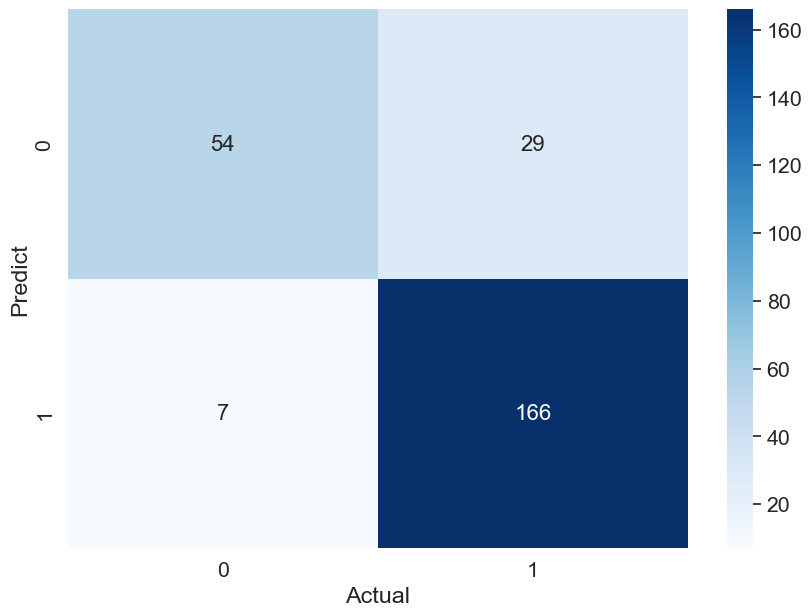

In [36]:
from sklearn.metrics import confusion_matrix


cm1 = confusion_matrix(Y_test, real_prediction)

# Piirrä sekaannusmatriisi
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(cm1, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues') 


plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()


8/8 - 18s - loss: 0.4517 - accuracy: 0.8594 - 18s/epoch - 2s/step


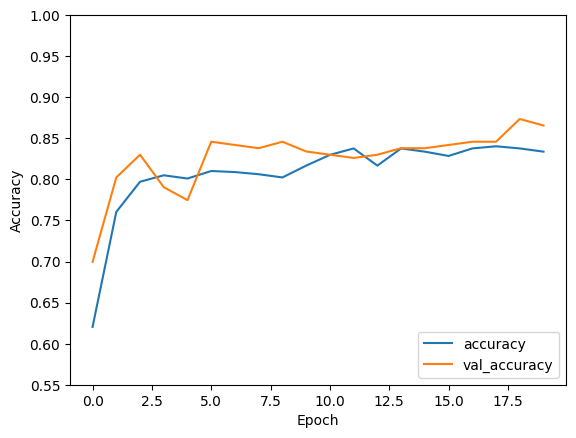

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.55, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

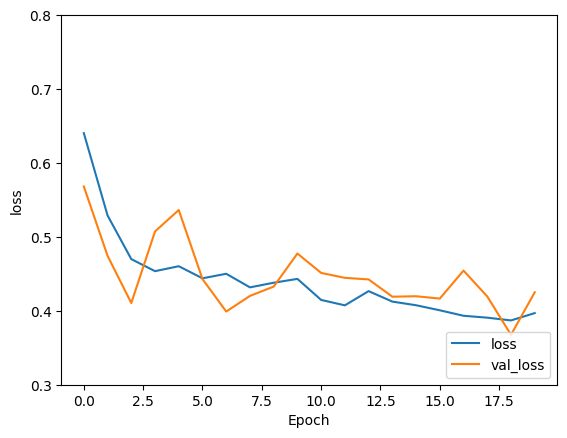

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0.3, 0.8
         ])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')



In [12]:
X_train.shape

(764, 224, 224, 3)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np



X_train_flatten = X_train.reshape((X_train.shape[0], -1))
X_test_flatten = X_test.reshape((X_test.shape[0], -1))
X_train_flatten = X_train.reshape((X_train.shape[0], -1))


clf = RandomForestClassifier(n_estimators=1000)


clf.fit(X_train_flatten, Y_train)

predictions = clf.predict(X_test_flatten)


print(f"Accuracy: {accuracy_score(Y_test, predictions)}")
print(f"Classification report: \n{classification_report(Y_test, predictions)}")


Accuracy: 0.84375
Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        83
         1.0       0.88      0.88      0.88       173

    accuracy                           0.84       256
   macro avg       0.82      0.82      0.82       256
weighted avg       0.84      0.84      0.84       256



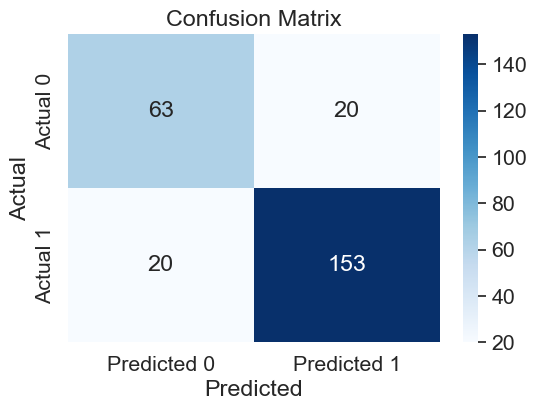

In [43]:
cm2 = confusion_matrix(Y_test, real_prediction)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

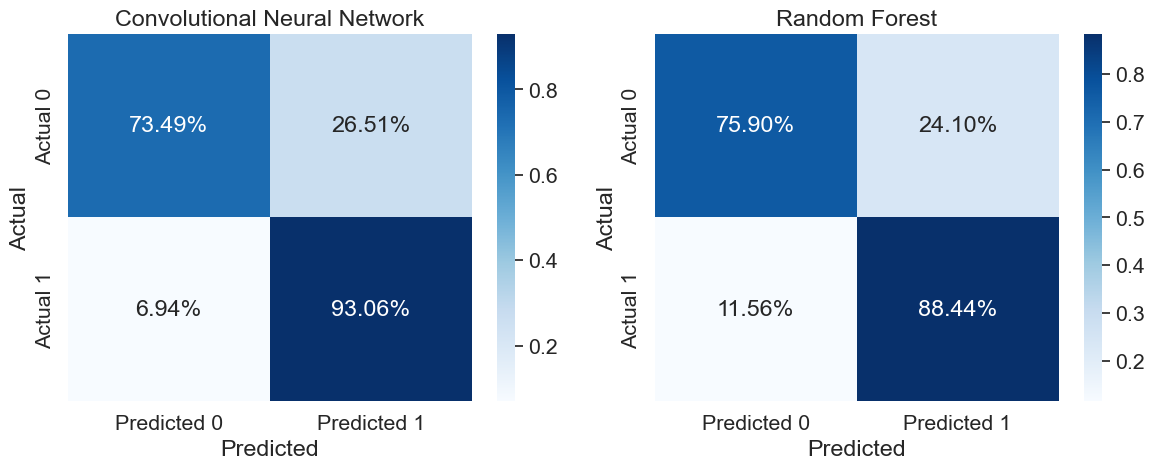

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


cm1_norm = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

cm2_norm = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm1_norm, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"],
            ax=ax[0])  
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Convolutional Neural Network")


sns.heatmap(cm2_norm, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"],
            ax=ax[1])  
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
ax[1].set_title("Random Forest")

plt.tight_layout()
plt.show()
